In [2]:
# average ensemble model


# import concatenate layer
from tensorflow.keras.layers import Concatenate
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Average
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Average
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
input = Input(shape=(224, 224, 3), name='input')  # input layer

In [4]:
densenet_model = load_model('/content/drive/MyDrive/AI/Skin Cancer/densenet121_melanoma_classifier.keras')
resnet_model = load_model('/content/drive/MyDrive/AI/Skin Cancer/resnet50_melanoma_classifier.keras')
efficientnet_model = load_model('/content/drive/MyDrive/AI/Skin Cancer/efficientnet_melanoma_classifier.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 738 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 438 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 436 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
models = [densenet_model,resnet_model,efficientnet_model]

# get output for each model input
outputs = [model(input) for model in models]

# Extract tensors from nested lists
outputs = [output[0] for output in outputs]

x = Average()(outputs)
x = Dense(128, activation='relu', name='dense_1')(x)

# add further layers
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax', name='output')(x) # output layer

# create concatenated model
avg = Model(input, output, name= 'Ensemble_Model')

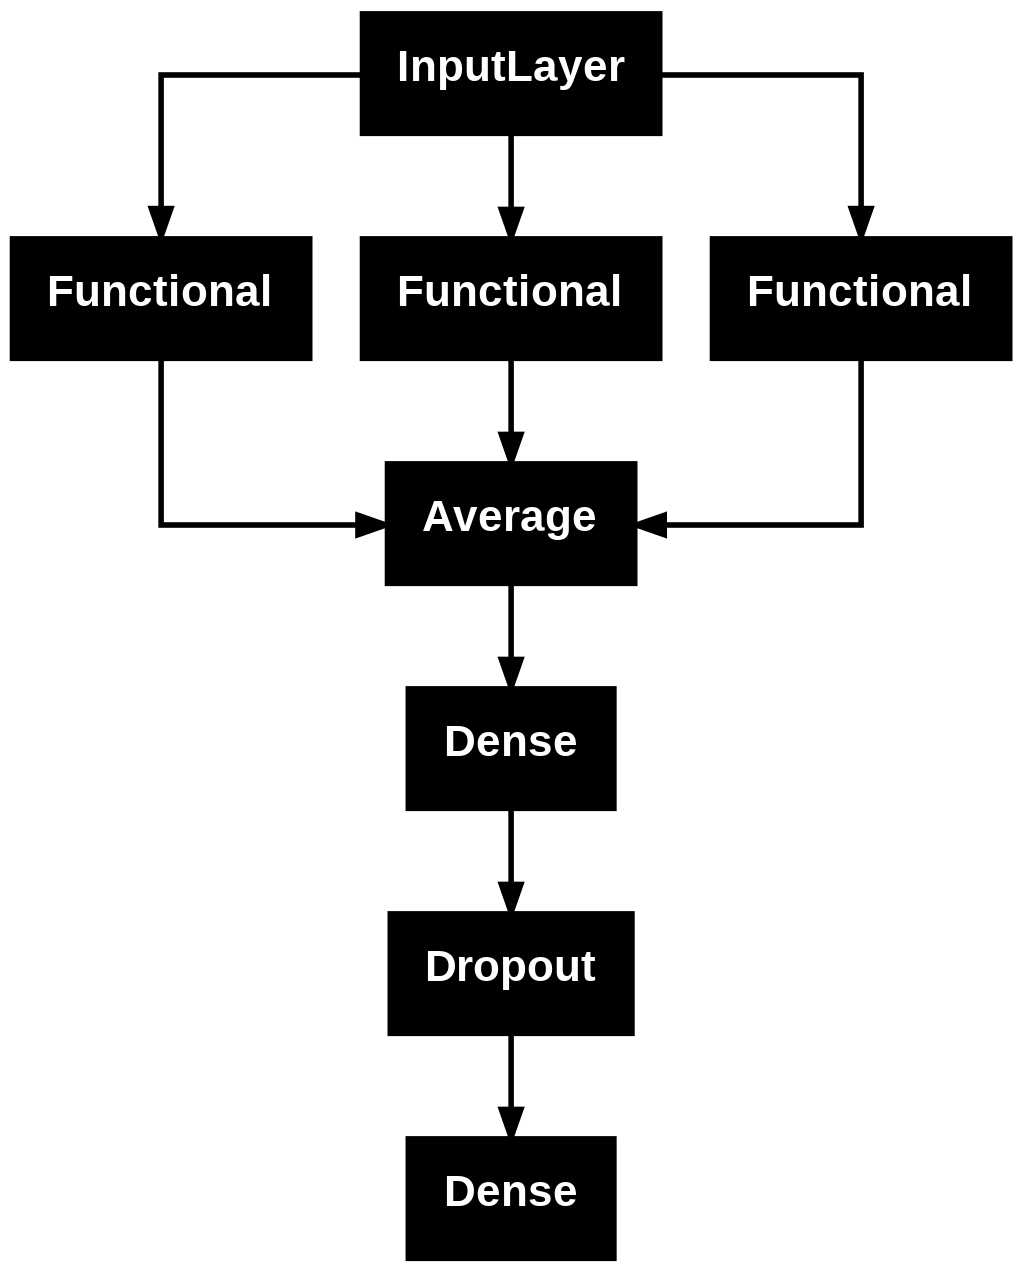

In [ ]:
# show model structure
from tensorflow.keras.utils import plot_model
plot_model(avg)

In [ ]:
img_paths = ["ISIC_0024951", "ISIC_0030106", "ISIC_0031779", "ISIC_0028442", "ISIC_0031745", "ISIC_0031586", "ISIC_0031972", "ISIC_0030539"]
img_paths2 = ["ISIC_0027326", "ISIC_0030789", "ISIC_0027008", "ISIC_0028790", "ISIC_0028880", "ISIC_0025009", "ISIC_0033492", "ISIC_0030021"]
for i in range(len(img_paths)):
  img_paths[i] = "/content/drive/MyDrive/AI/Skin Cancer/Skin Cancer/" + img_paths[i] + ".jpg"
  img_paths2[i] = "/content/drive/MyDrive/AI/Skin Cancer/Skin Cancer/" + img_paths2[i] + ".jpg"

classification = {0:'not melanoma', 1:'melanoma'}

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Predict
print("Melanoma images:")
for i in img_paths:
  # Preprocess the image
  preprocessed_image = preprocess_image(i)
  predm = avg.predict(preprocessed_image)
  print(predm, classification[np.argmax(predm, axis=-1)[0]])

print("\nNon-Melanoma images:")
for i in img_paths2:
  # Preprocess the image
  preprocessed_image = preprocess_image(i)
  prednm = avg.predict(preprocessed_image)
  print(prednm, classification[np.argmax(prednm, axis=-1)[0]])

Melanoma images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[0.48091325 0.5190868 ]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[0.47913554 0.5208644 ]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[0.48095793 0.51904213]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.48096672 0.51903325]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.48158386 0.51841617]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[[0.48112938 0.5188706 ]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[0.48019168 0.5198083 ]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.48139802 0.51860195]] melanoma

Non-Melanoma images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.47965014 0.52034986]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.48055384 0.51944613]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.48171315 0.5182869 ]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.481087   0.51891303]] melanoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.48097703 0.51902306]] melanoma
1/1 ━━━

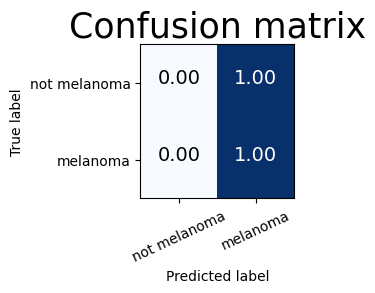

In [6]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual, predicted):

    cm = confusion_matrix(actual, predicted)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(2,2))
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix', fontsize=25)

    tick_marks = np.arange(2)
    classes = ['not melanoma', 'melanoma']
    plt.xticks(tick_marks, classes, rotation=25)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Convert to a NumPy array
plot_confusion_matrix([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])